In [12]:
import os
from pathlib import Path
import re


# Define instruments (IRMAS has 11 categories)
INSTRUMENTS = ['cel', 'cla', 'flu', 'gac', 'gel', 'org', 'pia', 'sax', 'tru', 'vio', 'voi']
DRUMS = ['nod', 'dru']

def parse_labels(txt_file):
    """Reads labels from a .txt file and converts to multi-hot vector."""
    with open(txt_file, 'r') as f:
        labels = f.read()
        print(labels)
    multi_hot = [1 if inst in labels else 0 for inst in INSTRUMENTS]
    drum_vector = [1 if 'drum' in labels else 0]
    return multi_hot + drum_vector

def parse_training_filename(filename):
    """Extracts instrument and drum labels from the filename."""
    # Match labels enclosed in square brackets
    labels = re.findall(r'\[(\w+)\]', filename)
    
    # Identify instrument (first match from INSTRUMENTS)
    instrument = next((label for label in labels if label in INSTRUMENTS), None)
    # Identify drum label
    drum = next((label for label in labels if label in DRUMS), None)
    
    return instrument, drum

def encode_labels(instrument, drum):
    """Creates a multi-hot vector for instrument and drum labels."""
    instrument_vector = [1 if inst == instrument else 0 for inst in INSTRUMENTS]
    drum_vector = [1 if drum == 'dru' else 0]  # 1 for drums, 0 for no drums
    print(instrument_vector, drum_vector)
    return instrument_vector + drum_vector

# Example: Parse a single file
txt_path = "Sample_Dataset/train/02. School Boy-9.txt"
print(parse_labels(txt_path))  # e.g., [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
filename = "[vio][cla]2092__2.wav"
print(parse_training_filename(filename))  # Output: ('vio', None)

instrument, drum = parse_training_filename(filename)
label_vector = encode_labels(instrument, drum)
print(label_vector)  # Output: [0, 0, 0, ..., 1, 0] + [0] (no drums)

pia	
tru	

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
('vio', None)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0] [0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


In [13]:
def create_training_dataset(audio_dir):
    dataset = []
    for root, _, files in os.walk(audio_dir):
        for file in files:
            if file.endswith('.wav'):
                # Parse labels from filename
                instrument, drum = parse_training_filename(file)
                if instrument:  # Ensure valid instrument is found
                    label = encode_labels(instrument, drum)
                    dataset.append((os.path.join(root, file), label))
    return dataset

train_data = create_training_dataset("IRMA\IRMAS-TrainingData")

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0]
[1, 0, 0, 0,

<>:13: SyntaxWarning: invalid escape sequence '\I'
<>:13: SyntaxWarning: invalid escape sequence '\I'
C:\Users\joses\AppData\Local\Temp\ipykernel_9248\2572124726.py:13: SyntaxWarning: invalid escape sequence '\I'
  train_data = create_training_dataset("IRMA\IRMAS-TrainingData")


In [14]:
def create_dataset(audio_dir, label_dir):
    dataset = []
    for audio_file in os.listdir(audio_dir):
        if audio_file.endswith('.wav'):
            txt_file = Path(label_dir) / f"{Path(audio_file).stem}.txt"
            if txt_file.exists():
                labels = parse_labels(txt_file)
                dataset.append((os.path.join(audio_dir, audio_file), labels))
    return dataset

test_data = create_dataset("IRMA\\IRMAS-TestingData-Part1\\Part1", "IRMA\\IRMAS-TestingData-Part1\\Part1")

gel	

gel	

gel	
voi	

gel	
voi	

gel	
voi	

gel	
pia	

gel	
voi	

gel	
voi	

gel	

gel	
voi	

gel	

gel	
pia	

voi	

gel	

pia	
voi	

gac	
voi	

gel	
voi	

gel	
voi	

gel	
voi	

gel	
voi	

gel	
voi	

gel	
voi	

voi	

voi	

voi	

voi	

voi	

gel	

gel	
voi	

gel	
org	
voi	

gel	
voi	

gel	
voi	

gel	
org	
voi	

gel	
voi	

gel	
voi	

gel	
voi	

gel	
org	
voi	

gel	
voi	

gel	
org	
voi	

gel	
voi	

gel	
org	
voi	

gel	

gel	

gel	
voi	

cel	
gel	

gel	
voi	

gel	

gel	

gac	
voi	

gac	
voi	

gac	
voi	

gac	
voi	

gac	
voi	

gac	
voi	

gac	
voi	

gac	
voi	

gac	
voi	

gac	
voi	

voi	

gac	
voi	

sax	
tru	

pia	

pia	

pia	
tru	

pia	
tru	

pia	

pia	

pia	
sax	
tru	

pia	
tru	

pia	
sax	
tru	

pia	
sax	
tru	

sax	
tru	

pia	
sax	
tru	

pia	
sax	

pia	
sax	

pia	
tru	

pia	
tru	

pia	

pia	

pia	

pia	
sax	
tru	

sax	
tru	

pia	
sax	
tru	

pia	
sax	
tru	

pia	
tru	

pia	
tru	

pia	
sax	

pia	
sax	

vio	

pia	

pia	
voi	

pia	
voi	

pia	

pia	
voi	

pia	
voi	

pia	
voi	

pia	
voi	

pia	
voi

In [15]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def audio_to_spectrogram(audio_path, save_path, sr=22050, n_fft=2048, hop_length=512):
    # Load audio file
    y, sr = librosa.load(audio_path, sr=sr)
    
    # Compute Mel spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
    S_dB = librosa.power_to_db(S, ref=np.max)
    
    # Save as image
    plt.figure(figsize=(4, 4))
    librosa.display.specshow(S_dB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
    plt.axis('off')
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.close()

# Example usage
audio_to_spectrogram("Sample_Dataset/train/02. School Boy-9.wav", "spectograms/02. School Boy-9.png")

In [16]:
def progress_bar(current, total, width=50):
    """
    Create a simple string-based progress bar.
    
    Args:
    current (int): Current progress value
    total (int): Total number of items
    width (int): Width of the progress bar in characters
    
    Returns:
    str: Formatted progress bar string
    """
    percentage = float(current) / total
    filled = int(width * percentage)
    bar = '=' * filled + '-' * (width - filled)
    percent_display = int(percentage * 100)
    
    return f'[{bar}] {percent_display}% ({current}/{total})'

def preprocess_data(dataset, save_dir):
    total_items = len(dataset)
    
    for i, (audio_path, labels) in enumerate(dataset, 1):
        # Create spectrogram
        spectrogram_path = os.path.join(save_dir, f"{Path(audio_path).stem}.png")
        audio_to_spectrogram(audio_path, spectrogram_path)
        
        # Save labels
        label_path = os.path.join(save_dir, f"{Path(audio_path).stem}.npy")
        np.save(label_path, labels)
        
        # Print progress bar
        print(f'\rProcessing: {progress_bar(i, total_items)}', end='', flush=True)
    
    # New line after completion
    print('\nPreprocessing complete!')

In [21]:
preprocess_data(train_data, "procesado_train")

Processing: [==================================================] 100% (6705/6705)
Preprocessing complete!


In [7]:
preprocess_data(test_data, "procesado_test")

Processing: [==================================================] 100% (807/807)
Preprocessing complete!


In [20]:
validation_data = create_dataset("IRMA/IRMAS-TestingData-Part3/Part3", "IRMA/IRMAS-TestingData-Part3/Part3")
validation_data += create_dataset("IRMA/IRMAS-TestingData-Part2/Part2", "IRMA/IRMAS-TestingData-Part2/Part2")

cel	
vio	

cel	
vio	

cel	
vio	

cel	
vio	

cel	
vio	

cel	
vio	

cel	
vio	

cel	
vio	

cel	
vio	

cel	
vio	

cel	
vio	

cel	
vio	

cel	
vio	

cel	
vio	

cel	
vio	

gac	
gel	

gac	
gel	

gac	
gel	
voi	

gac	
gel	

gac	
voi	

gac	
voi	

gac	
gel	

gac	
gel	

gac	
gel	

gac	
gel	
voi	

gac	
gel	

gac	
gel	

gac	
gel	

gac	
gel	
voi	

gac	
gel	
voi	

gac	
gel	

gac	
voi	

gac	
voi	

tru	

pia	
tru	

pia	
tru	

tru	

tru	

tru	

tru	

tru	

pia	
tru	

sax	

pia	

gac	
gel	
voi	

gel	
voi	

gel	
org	
voi	

gel	
org	
voi	

gel	
org	
voi	

gel	
org	
voi	

org	
voi	

org	

org	

org	

org	

org	

org	

gel	
voi	

gel	
voi	

gac	
voi	

gel	
voi	

gel	
voi	

gel	
tru	
voi	

voi	

voi	

pia	
voi	

pia	

pia	

pia	
voi	

pia	
voi	

pia	
voi	

pia	
voi	

pia	
voi	

pia	

pia	
tru	

pia	

pia	
sax	

pia	
sax	

pia	

pia	

pia	

pia	
tru	

pia	
sax	
tru	

pia	
sax	
tru	

pia	
sax	
tru	

pia	
sax	
tru	

pia	
sax	
tru	

pia	
sax	
tru	

pia	
tru	

pia	
tru	

pia	
tru	

pia	
tru	

pia	

cla	
pia	

pia	



Processing: [--------------------------------------------------] 1% (31/2067)

KeyboardInterrupt: 

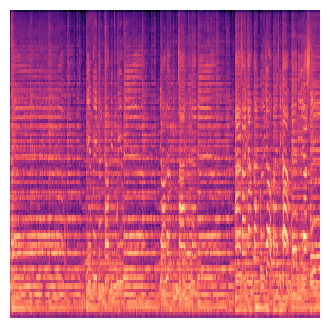

In [21]:
preprocess_data(validation_data, "procesado_valid")